# 0430-0502 RegressionKR_Review

# import modules

- 입력값과 출력값은 벡터, 그 사이의 추론해낸 행렬 함수가 인공신경망

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

1. pandas: 엑셀에서 데이터 불러오는데 유용
2. numpy: 행렬의 형태
3. matplotlib: plotting, visualization

# data preparation and visualization

- visualization of pattern

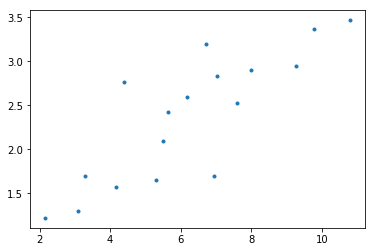

In [3]:
pd.read_csv('regression.csv')
data = pd.read_csv('regression.csv')
X = data['X']
Y = data['Y']             
plt.plot(X,Y, '.')

# create model

- creating 인공신경망 모델 (모델이란 : 함수 y=ax+b)

- sequential: 모든 입력 벡터는 하나의 sequential을 따른다

model.add(Dense(1, input_shape=[1])) -> Dense(출력부=y의 갯수, input shape=[n] = 입력부의 갯수) ->y=ax+b

1. Sequential() ->모델의 시작

2. model.add ->모델을 정의 (출력, 입력) / dense: 모델이 fully connected 되어있다

        - (Dense(1, input_shape=[1])) = (출력부=y의 갯수, input shape=[x] = 입력부의 갯수) ->y=ax+b
        
3. sdg: 미분 알고리즘 / loss: 정답값과 예측값의 차이를 구하는 방법 ->complie: 모델 정의

In [4]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.compile(optimizer='sgd', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# train model

- creating good model = fil한 a, b값을 만드는것

In [5]:
model.fit(X,Y, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
17/17 [==============================] - 0s 22ms/sample - loss: 0.4118
Epoch 2/100
17/17 [==============================] - 0s 123us/sample - loss: 0.2324
Epoch 3/100
17/17 [==============================] - 0s 140us/sample - loss: 0.2304
Epoch 4/100
17/17 [==============================] - 0s 61us/sample - loss: 0.2300
Epoch 5/100
17/17 [==============================] - 0s 145us/sample - loss: 0.2296
Epoch 6/100
17/17 [==============================] - 0s 142us/sample - loss: 0.2293
Epoch 7/100
17/17 [==============================] - 0s 142us/sample - loss: 0.2289
Epoch 8/100
17/17 [==============================] - 0s 112us/sample - loss: 0.2285
Epoch 9/100
17/17 [==============================] - 0s 235us/sample - loss: 0.2282
Epoch 10/100
17/17 [==============================] - 0s 163us/sample - loss: 0.2278
Epoch 11/100
17/17 [==============================] - 0s 232us/sample - loss: 0.2274
Epoch 12/100
17/17 [========

Epoch 95/100
17/17 [==============================] - 0s 0s/sample - loss: 0.2028
Epoch 96/100
17/17 [==============================] - 0s 178us/sample - loss: 0.2025
Epoch 97/100
17/17 [==============================] - 0s 131us/sample - loss: 0.2023
Epoch 98/100
17/17 [==============================] - 0s 176us/sample - loss: 0.2021
Epoch 99/100
17/17 [==============================] - 0s 127us/sample - loss: 0.2018
Epoch 100/100
17/17 [==============================] - 0s 120us/sample - loss: 0.2016


- 17/17 : 우리의 17가지 data를 이용하였다

- 첫번째에는 data loss가 2였는데 마지막에는 0.1까지 내려감 ->점차 수렴

# model prediction

- prediction: 위에서 구한 것 a, b값이 실제로도 잘 되는지 확인 (시스템을 만들고 결과를 모르는 상태에서 입력값을 넣어보는 것)

- 어떠한 x값을 내가 제공하고, y값을 구함

In [6]:
x = [0, 1, 2, 3, 4, 5, 6 ,7, 8, 9, 10]
y = model.predict(x)

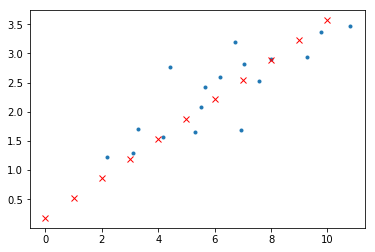

In [7]:
plt.plot(X,Y,'.')
plt.plot(x, y, 'rx')
plt.show()

# what are a and b in y = ax + b?

- 위에서 만든 a, b가 궁금할 때

- model.layer: 함수의 층위->우리는 하나만 만들었으므로 [0] 첫번째 하나만 가져옴

- weight: 그 값

In [8]:
weight = model.layers[0].get_weights()
print(weight)

[array([[0.3390185]], dtype=float32), array([0.17929122], dtype=float32)]


기울기
첫번째 결과는 a 값, 두번째는 b